<a href="https://colab.research.google.com/github/Jivitesh2001/Loan-Prediction-/blob/main/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loan Prediction

#Exploratory Data Analysis

##Importing Libraries

In [ ]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import datetime 
import math
import statsmodels.api as sm 
import pylab as py 

from google.colab import drive
drive.mount('/content/drive')
%matplotlib inline
import warnings 
warnings.filterwarnings(action = 'ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [ ]:
#importing the data
train_d = pd.read_csv('/content/drive/MyDrive/data/loan_prediction/train_file.csv')
train_d.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
train_d.shape

(614, 13)

In [ ]:
train_d.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Checking Missing values

In [ ]:
train_d.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in the variables such as:
* Gender
* Married
* Dependents
* Self_Employed
* LoanAmount
* Loan_Amount_Term
* Credit_History


In [ ]:
(train_d.isnull().sum()/len(train_d))*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

This seems to be very small percentage of missing values in the dataset. But some variables have more than 5% of missing values.


In [ ]:
train_d.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
train_d.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

##Variable Identification and Typecasting

In [ ]:
train_d.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Numerical Datatype

**Int Datatype**

In [ ]:
train_d.dtypes[(train_d.dtypes == 'int64')]

ApplicantIncome    int64
dtype: object

* **ApplicantIncome** is the income of the applicant

**Float Datatype**

In [ ]:
train_d.dtypes[(train_d.dtypes == 'float64')]

CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
dtype: object

In [ ]:
train_d[['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,NaN,360.0,1.0
1,1508.0,128.0,360.0,1.0
2,0.0,66.0,360.0,1.0
3,2358.0,120.0,360.0,1.0
4,0.0,141.0,360.0,1.0
...,...,...,...,...
609,0.0,71.0,360.0,1.0
610,0.0,40.0,180.0,1.0
611,240.0,253.0,360.0,1.0
612,0.0,187.0,360.0,1.0


In [ ]:
train_d['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
train_d['Credit_History'].unique()

array([ 1.,  0., nan])

* **CoapplicantIncome** is the income of coapplicant. It should remain as **float** datatype.
* **LoanAmount** is the amount of money in thousands lent to the applicant. It is okay as **float** datatype.
* **Loan_Amount_Term** is the term of the loan in months. The number of months to repay the loan. It is a whole number.
* **Credit_History** is the measure of your ability to repay a debt. It should be converted into a categorical variable.


In [ ]:
train_d.Credit_History = train_d.Credit_History.map({1:'1',0:'0'})

In [ ]:
months = {360.0:'360', 120.0:'120', 240.0:'240', 180.0:'180',  60.0:'60', 300.0:'300', 480.0:'480',  36.0:'36',  84.0:'84',  12.0:'12'} 

In [ ]:
train_d.Loan_Amount_Term = train_d.Loan_Amount_Term.map(months)

In [ ]:
train_d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


**Object Datatype**

In [ ]:
train_d.dtypes[(train_d.dtypes == 'object')]

Loan_ID             object
Gender              object
Married             object
Dependents          object
Education           object
Self_Employed       object
Loan_Amount_Term    object
Credit_History      object
Property_Area       object
Loan_Status         object
dtype: object

* **Loan_ID** id the unique id given to each borrower to get the loan approval.
* **Gender** is the sex of the applicant.
* **Married** tells about the maritial status about the applicant.
* **Dependents** is the number of people relying on the applicant for the financial support.
* **Education** - whether the applicant is graduate or under graduate.
* **Self_Employed** - any person who earns their living from any independent pursuit of economic activity.
* **Property_Area** - whether the applicant lives in a Urban, Rural or Semi-Urban area.
* **Loan_Status** is the target variable. It tells whether the person's loan will be approved or not.


# **Univariate Analysis**

## Continous

In [ ]:
train_d.select_dtypes(include=['int64','float64']).dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
dtype: object

In [ ]:
Income = ['ApplicantIncome','CoapplicantIncome']
Loan = ['LoanAmount']

In [ ]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

**Income**

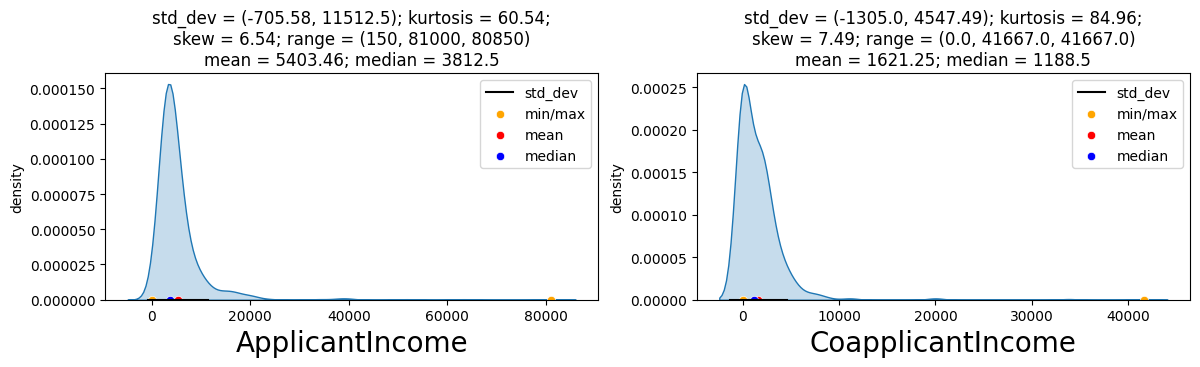

In [ ]:
UVA_numeric(train_d,Income)

* Median **ApplicantIncome** is 3812.5. There seems to be large outliers on the extreme side.
* Median **CoapplicantIncome** is 1188.5. Also in this case, there are very large outliers.
* These outliers are caused due to some people earning more income.


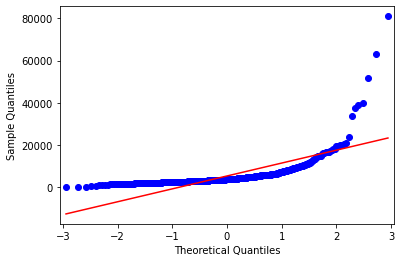

In [ ]:
sm.qqplot(train_d['ApplicantIncome'],line='s')
py.show()

QQ-plot shows that it has a large number of outliers on the extreme sides.

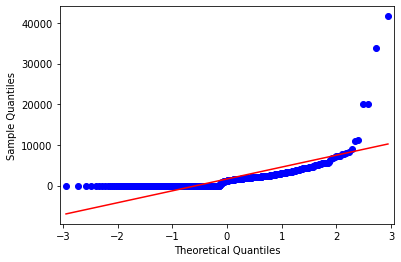

In [ ]:
sm.qqplot(train_d['CoapplicantIncome'],line='s')
py.show()

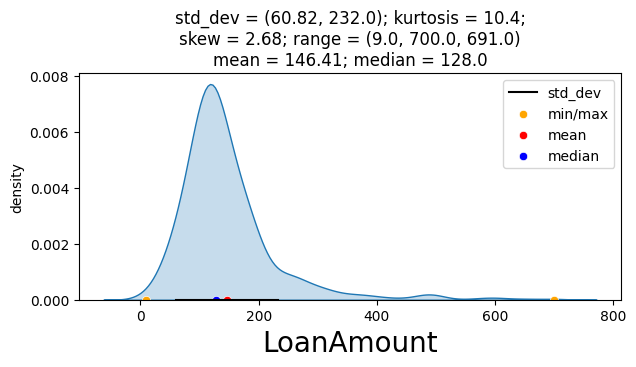

In [ ]:
UVA_numeric(train_d,Loan)

* Median **LoanAmount** is 128 thousands. There are some outliers on the extreme sides.
* These are outliers can be due to the fact that people having higher income may take higher amount of loan.

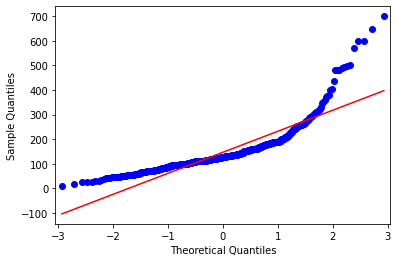

In [ ]:
LoanAmount = train_d['LoanAmount'][:]
LoanAmount = LoanAmount.dropna()
sm.qqplot(LoanAmount,line='s')
py.show()

QQ-plot shows that it has a large number of outliers on the extreme sides.

**Removing the outliers**

In [ ]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = train_d[Income + Loan]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['ApplicantIncome'] < factor*cm_data['ApplicantIncome'].std()]
cm_data = cm_data[cm_data['CoapplicantIncome'] < factor*cm_data['CoapplicantIncome'].std()]
cm_data = cm_data[cm_data['LoanAmount'] < factor*cm_data['LoanAmount'].std()]

# checking how many points removed
len(train_d), len(cm_data)

(614, 499)

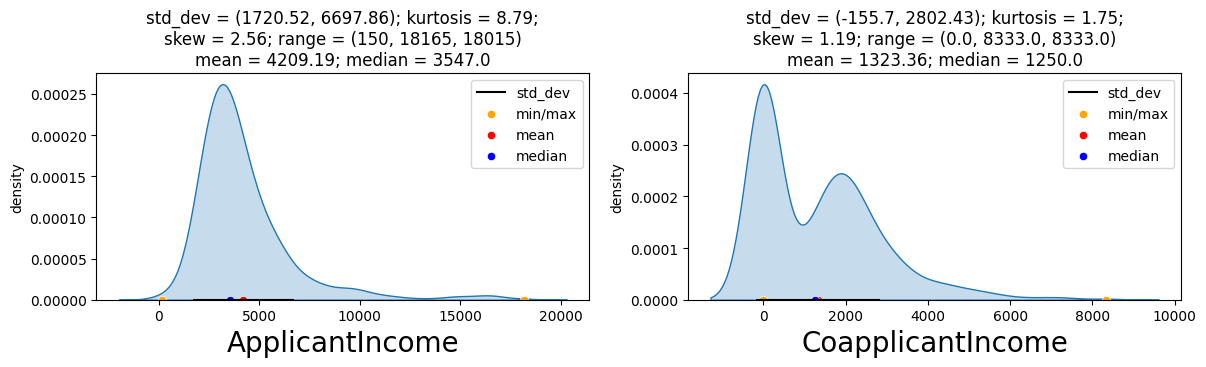

In [ ]:
UVA_numeric(cm_data,Income)

* After removing the outliers outside the 3 standard deviation, there are still some few outliers.
* A large number of **CoapplicantIncome** is zero.

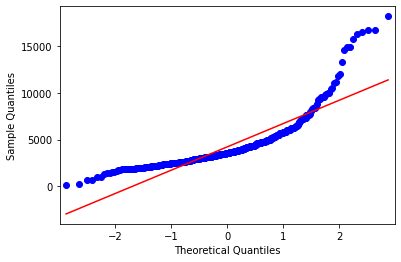

In [ ]:
sm.qqplot(cm_data['ApplicantIncome'],line='s')
py.show()

After taking only 3 standard deviation, qq-plot still shows some outliers.

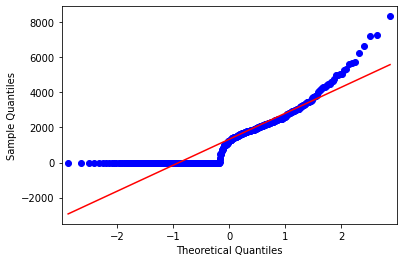

In [ ]:
sm.qqplot(cm_data['CoapplicantIncome'],line='s')
py.show()

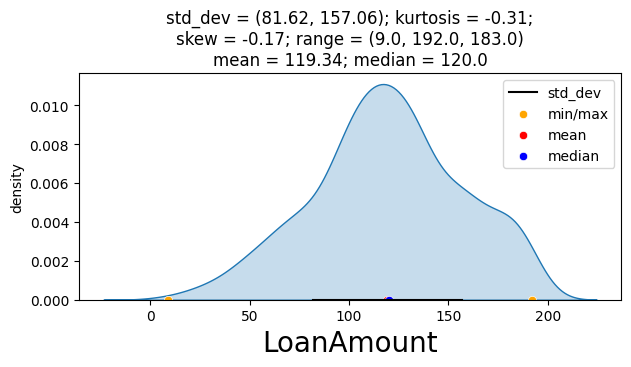

In [ ]:


UVA_numeric(cm_data,Loan)

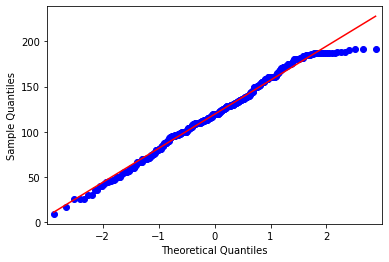

In [ ]:
sm.qqplot(cm_data['LoanAmount'],line='s')
py.show()

After removing the outliers it shows almost a normal distribution. But there are few outlier on the extreme large side.

## Categorical

In [ ]:
train_d.select_dtypes(exclude=['int64','float64','Int64']).dtypes

Loan_ID             object
Gender              object
Married             object
Dependents          object
Education           object
Self_Employed       object
Loan_Amount_Term    object
Credit_History      object
Property_Area       object
Loan_Status         object
dtype: object

* **Loan_ID** is unique variable it does not provide any information to the dataset so it should be dropped.

In [ ]:
 train_d = train_d.drop(columns=['Loan_ID'])
 train_d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


**Grouping the variables**

In [ ]:
customer_info = ['Gender','Married','Dependents','Education','Self_Employed']
loan_info = ['Credit_History','Loan_Amount_Term']
other = ['Property_Area']
loan_status = ['Loan_Status']

In [ ]:
cat_d = train_d[customer_info+loan_info+other+loan_status]

In [ ]:
cat_d.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Loan_Amount_Term,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,360,Urban,Y
1,Male,Yes,1,Graduate,No,1,360,Rural,N
2,Male,Yes,0,Graduate,Yes,1,360,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,360,Urban,Y
4,Male,No,0,Graduate,No,1,360,Urban,Y


In [ ]:
print(cat_d.isnull().sum())
print(cat_d.isnull().sum()/len(cat_d)*100)

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
Credit_History      50
Loan_Amount_Term    14
Property_Area        0
Loan_Status          0
dtype: int64
Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
Credit_History      8.143322
Loan_Amount_Term    2.280130
Property_Area       0.000000
Loan_Status         0.000000
dtype: float64


In [ ]:
cat_d.Gender.mode()[0]

'Male'

In [ ]:
cat_d.Gender = cat_d.Gender.fillna(cat_d.Gender.mode()[0])

In [ ]:
cat_d.Married = cat_d.Married.fillna(cat_d.Married.mode()[0])

In [ ]:
cat_d.Dependents = cat_d.Dependents.fillna(cat_d.Dependents.mode()[0])

In [ ]:
cat_d.Loan_Amount_Term = cat_d.Loan_Amount_Term.fillna(cat_d.Loan_Amount_Term.mode()[0])
cat_d.Self_Employed = cat_d.Self_Employed.fillna('Null')
cat_d.Credit_History = cat_d.Credit_History.fillna('Null')

In [ ]:
cat_d.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
Credit_History      0
Loan_Amount_Term    0
Property_Area       0
Loan_Status         0
dtype: int64

In [ ]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

### Customer Info

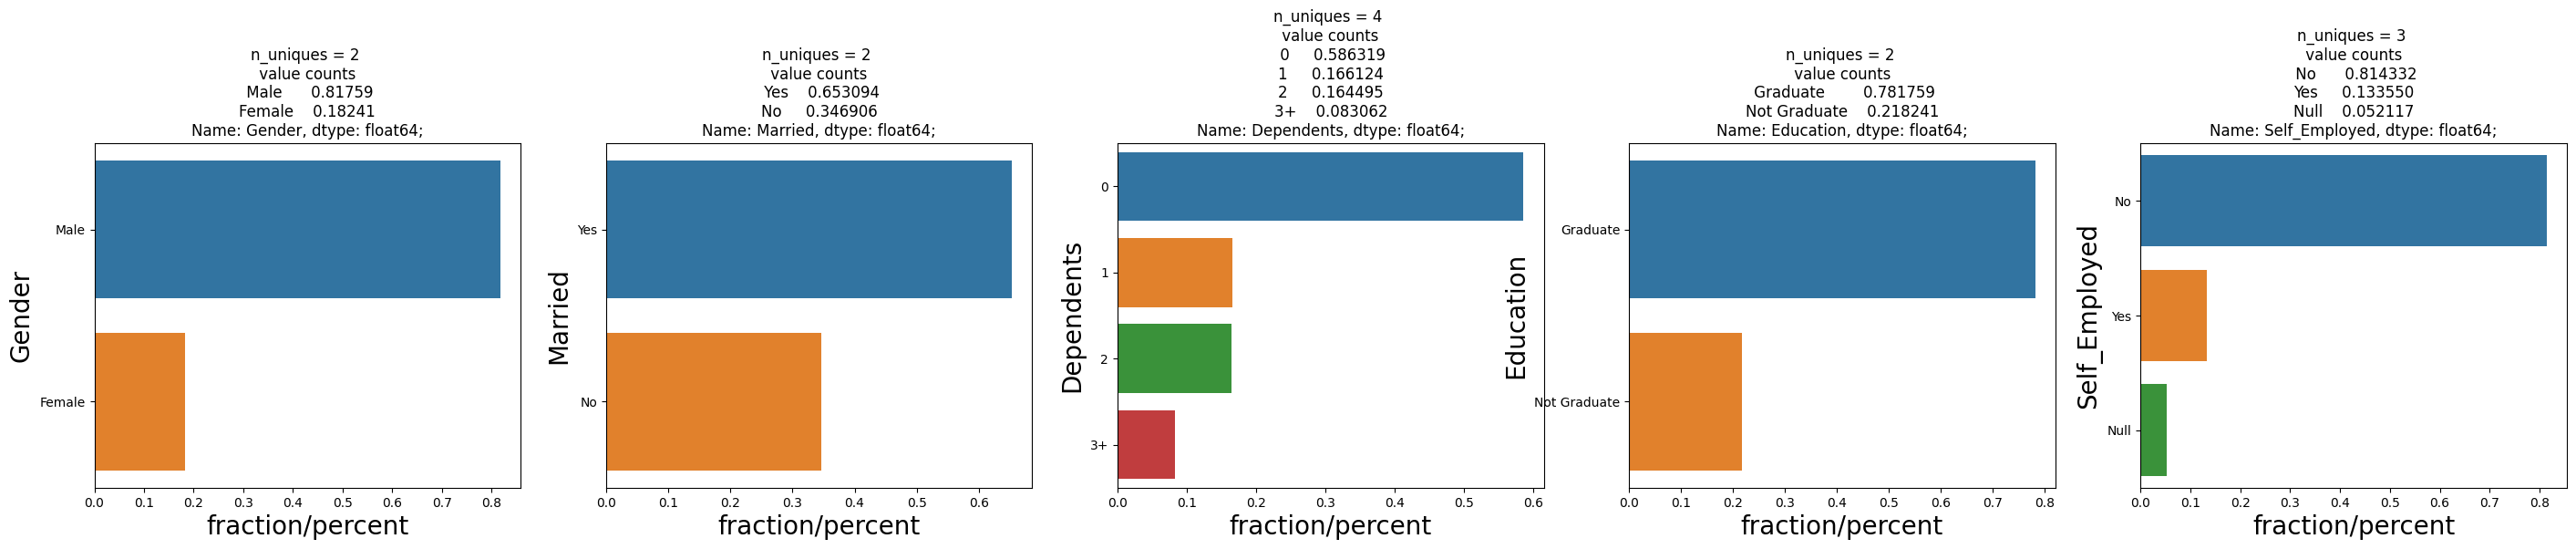

In [ ]:
UVA_category(cat_d,customer_info)

Summary of Customer Info:
* Gender
    * **Males** apply more than **4.5 times** for the loan than **females**.
* Maritial Status
    * Around 65% of people are married who applied for the loan.
* No. of Dependents
    * Around 58% of people who applied for the loan have **Zero** dependents.
    * Around 16% of people have **one** and **two** dependents respectively.
    * Around 8% of people have more than **three** dependents.
* Education
    * Around 78% of people are **graduated** and rest are undergraduated.
* Self_Employed
    * Around 81% of people are **not self employed**.
    * Around 13% of people are **self employed**.
    * Around 5% of people are filled **Null**. These may be due to some error or people didn't want to reveal about this category.

Thing to investigate further down:
* Possibility: People having **zero** no. of dependents get easily approved for loan.
* Possibility: **Graduates** have more chances of getting a loan approval.
* Possibility: Are **Males** more likely to get a loan approval?
* Possibility: People who are Self-Employed are less likely to get a loan approval.
 




### Loan Info

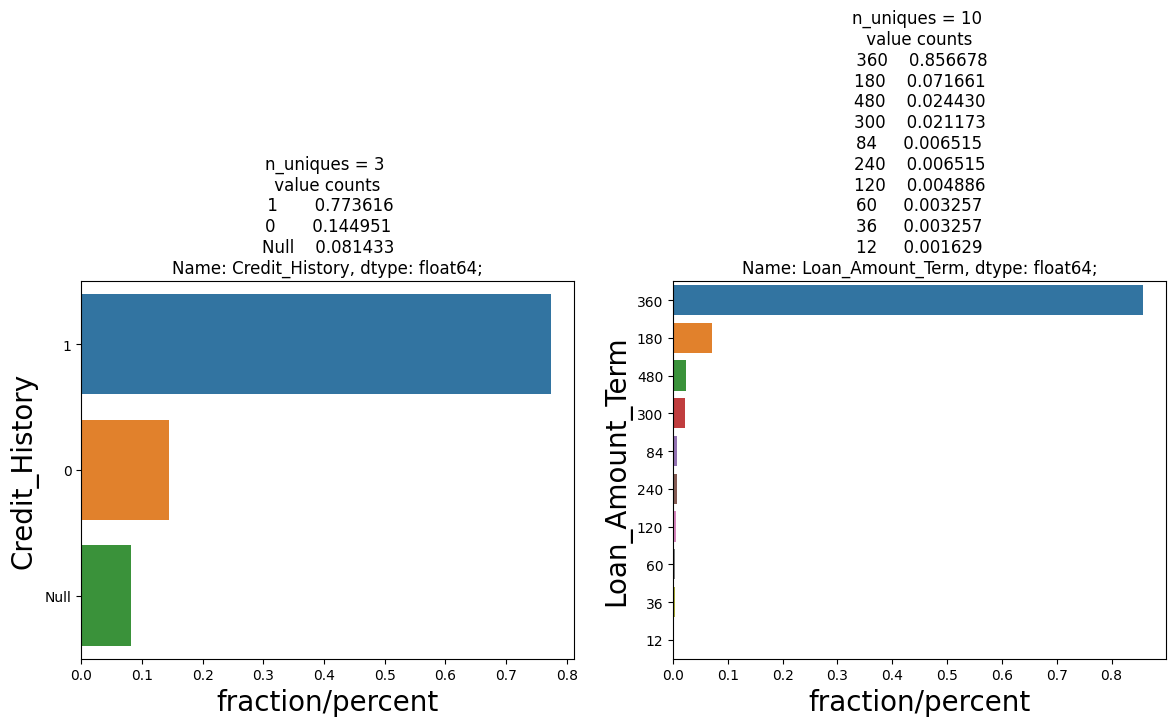

In [ ]:
UVA_category(cat_d,loan_info)

Summary:
* Credit History
    * Around 77% of people has the credit_history of **1**.
    * Around 14% of people has the credit_history of **0**.
    * Around 8% of people has the **Null** credit_history. This may be because some people might not know about what credit history is.
* Loan_Amount_Term 
    * Around 85% of the people who applied for the loan has a loan amount term for 360 months.

Things to investigate further down:
* Possibility: People having a Credit_History of **1** have a higher chance if getting a loan approval.
* Possiblity: Applying for 360 months for loan amount will lead to have a better chance for loan approval.

### Other Info

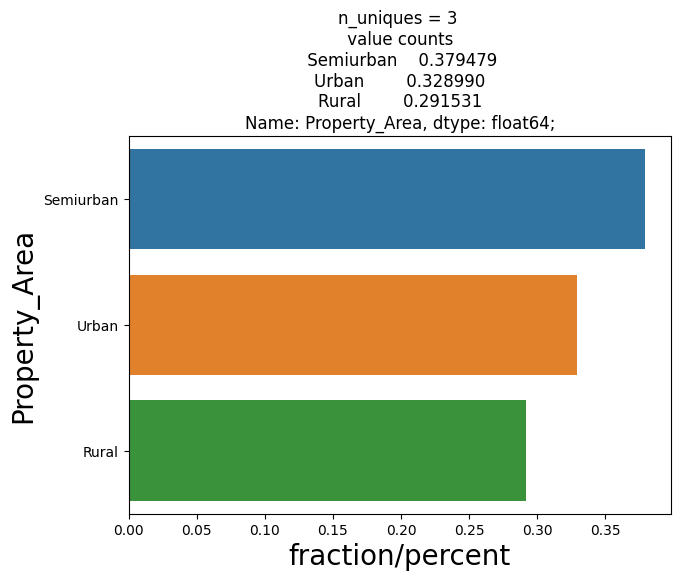

In [ ]:
UVA_category(cat_d,other)

Summary:
* Property_Area
    * Around 37.9% of people live in **Semi-Urban** area.
    * Around 32.8% of people live in **Urban** area.
    * Around 29% of people live in **Rural** area.

Things to investigate further down:
* Possibilitty: Do people living in **Semi-Urban** and **Urban** areas have higher possibility of getting a loan approval.


### Loan_Status

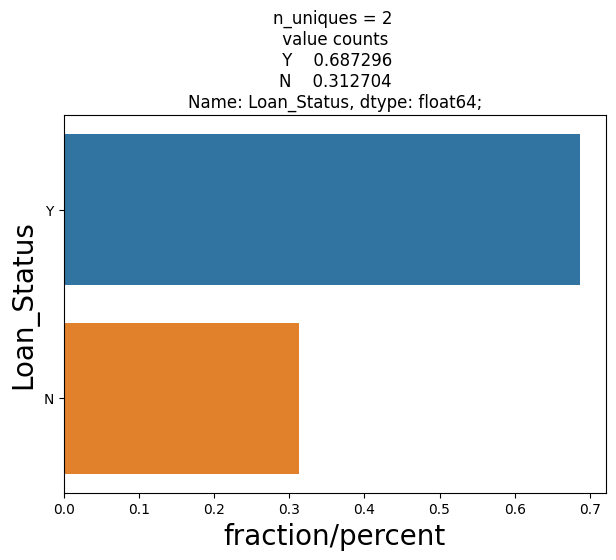

In [ ]:
UVA_category(cat_d,loan_status)

Summary:
* Loan_Status 
    * Around 68% of loans got a approved.
    * Data seems to be imbalanced.

## Univariate : Outlier

In [ ]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25 - (1.5*IQR)
    whis_high = quant75 + (1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="vertical")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high
      data2[i][data2[i]<whis_low] = whis_low
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="vertical")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


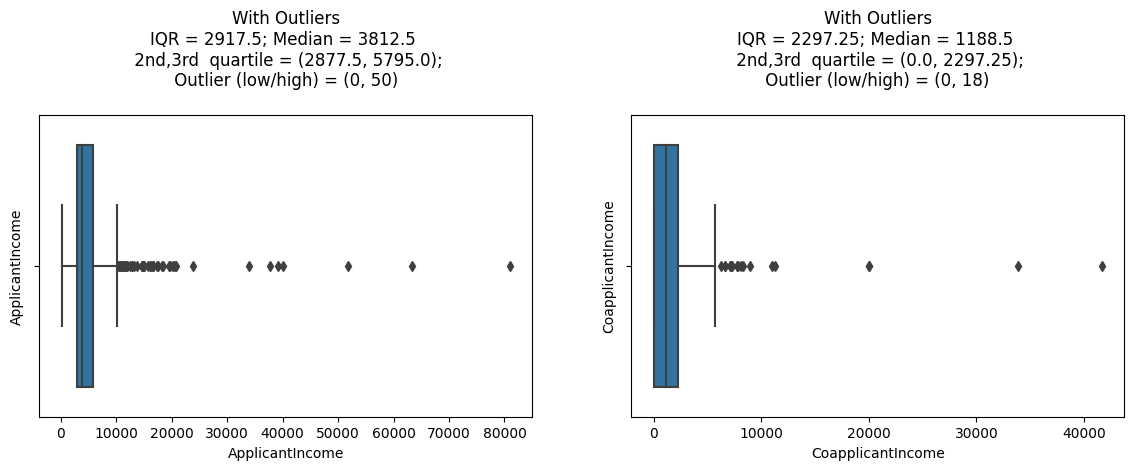

In [ ]:
UVA_outlier(train_d,Income)

* There seems to be some large outliers on the extreme side.

Now after removing the outliers

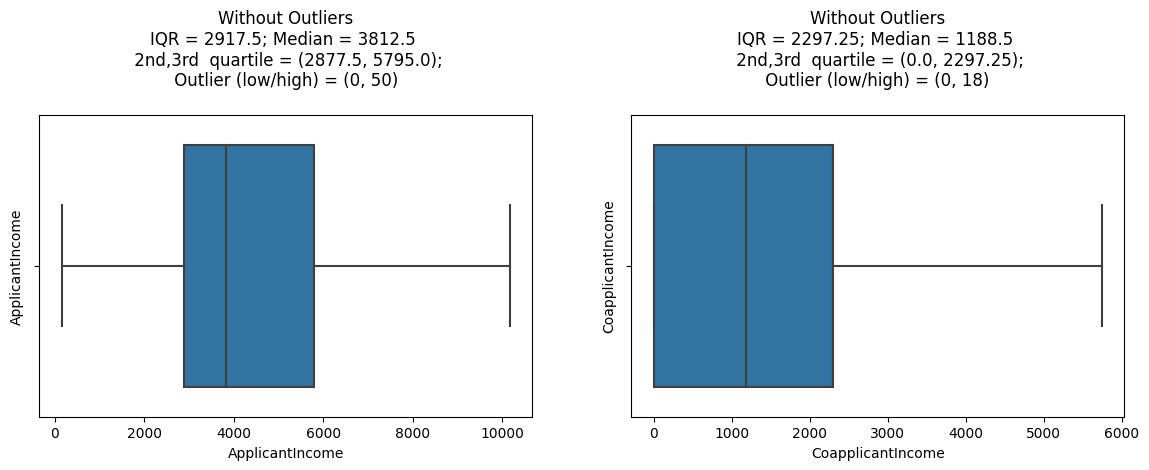

In [ ]:
UVA_outlier(train_d,Income,False)

Loan Amount

True


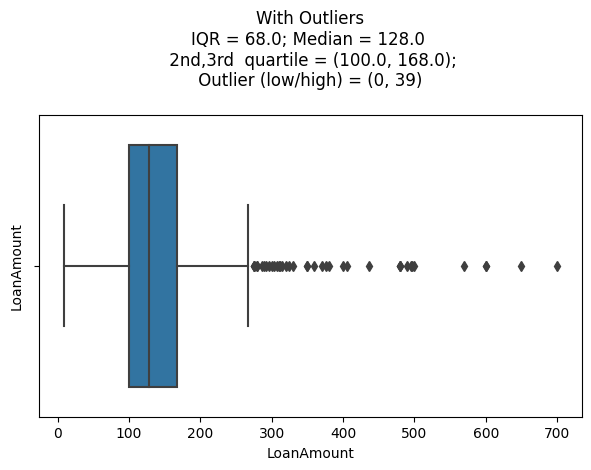

In [ ]:
UVA_outlier(train_d,Loan)

* There seems to be some outliers on the extreme side.

After removing the outliers

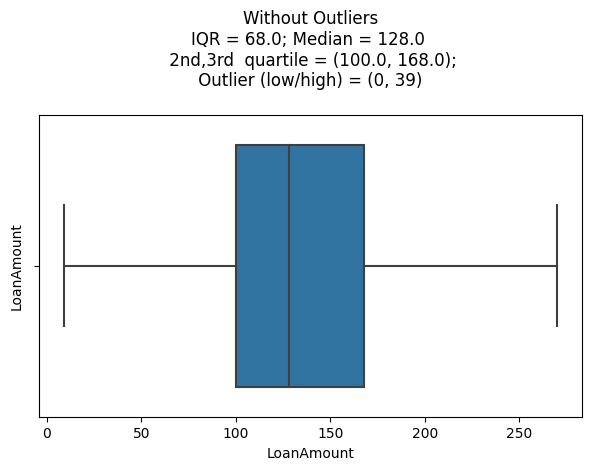

In [ ]:
UVA_outlier(train_d,Loan,False)

## Investigation directions from Univariate Analysis


* Loan_ID can be dropped.
* Applicant's having higher income get a loan approval easily?
* Higher Loan Amount may lead applicant and coapplicant having higher income?
* Are **Males** more likely to get a loan approval?
* People having zero no. of dependents get easily approved for loan.
* Graduates have more chances of getting a loan approval.
* People having a Credit_History of 1 have a higher chance if getting a loan approval.
* Do people living in Semi-Urban and Urban areas have higher possibility of getting a loan approval.
* Applying for 360 months for loan amount will lead to have a better chance for loan approval. 
* People who are Self-Employed are less likely to get a loan approval.

# Bivariate Analysis

## Continous - Continous

In [ ]:
numerical = train_d.select_dtypes(include=['int64','float64','Int64'])[:]
numerical.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
dtype: object

**Correlation Matrix**

In [ ]:
correlation = numerical.dropna().corr(method='pearson')
correlation

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.113695,0.570909
CoapplicantIncome,-0.113695,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


**Heatmap**

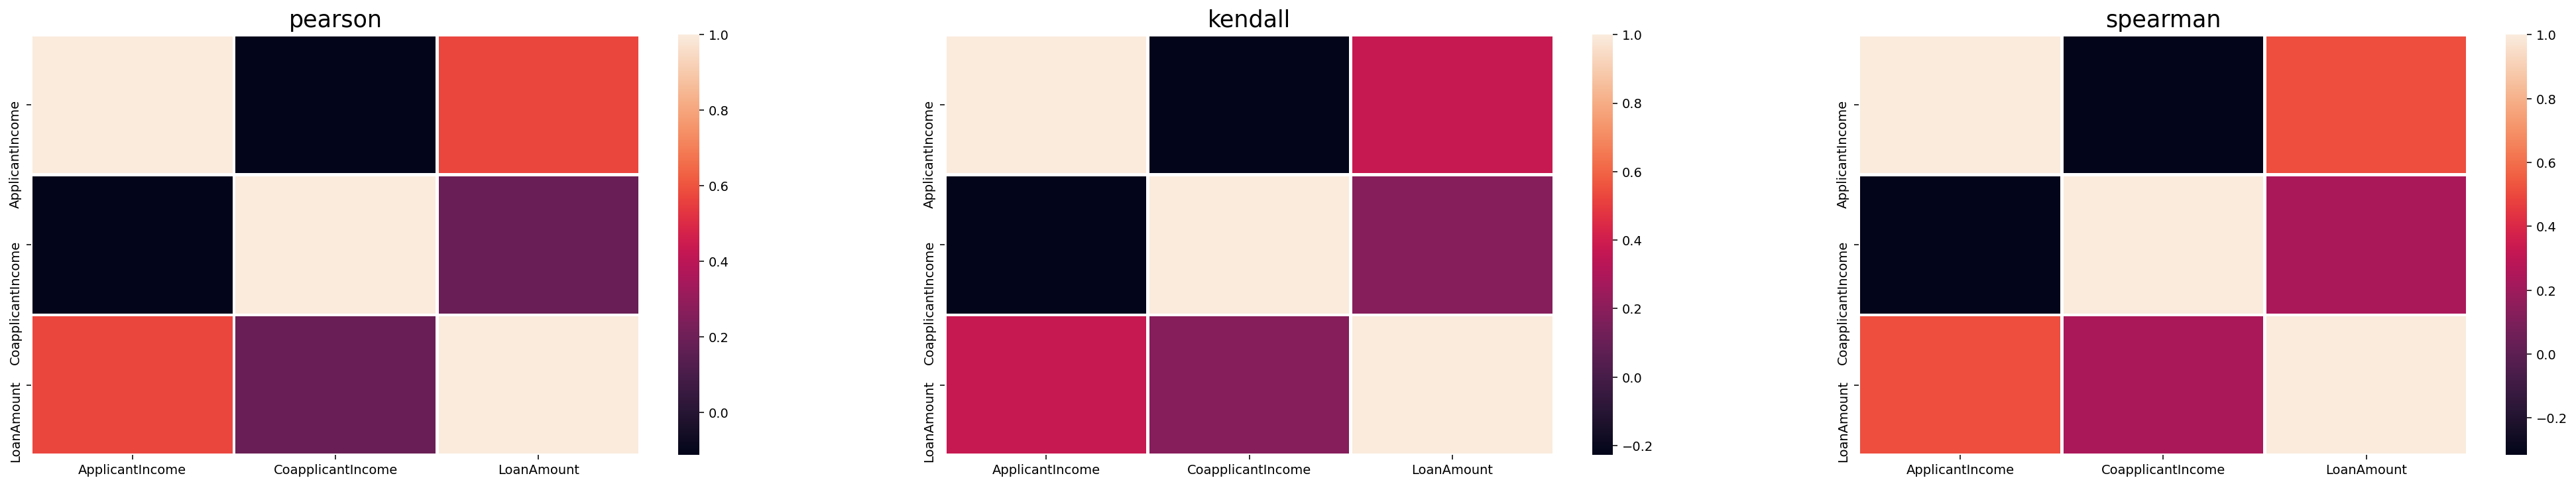

In [ ]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)


**Inferences**:
* There seems to some correlation between Applicant's Income and Loan Amount. This may show that people with higher income may apply for higher loan amount.

**Scatter Plot**

<Figure size 840x560 with 0 Axes>

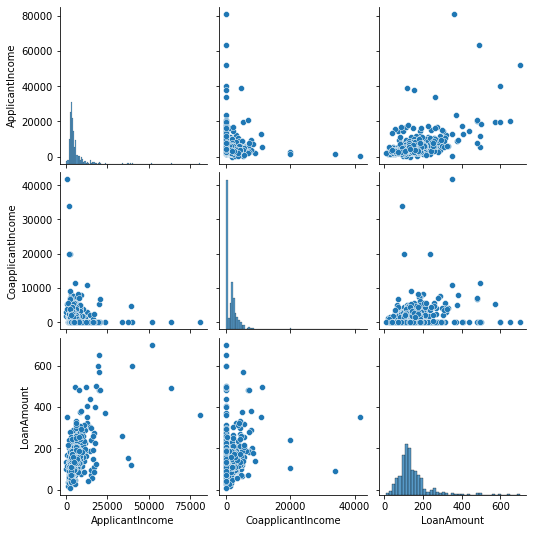

In [ ]:
plt.figure(dpi= 140)
sns.pairplot(numerical[Income+Loan])

**Taking log transformation for all the variables to have a better view**


In [ ]:
#taking log of every value to negate outliers
var = Income + Loan
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<function matplotlib.pyplot.show>

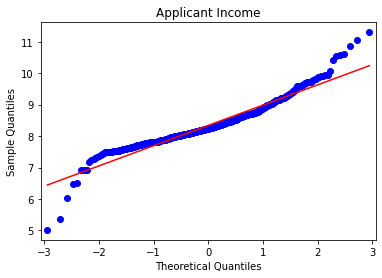

In [ ]:
sm.qqplot(numerical['ApplicantIncome'],line='s')
plt.title('Applicant Income')
py.show

This seems to have attain a normal distribution after log transformation. Still there are some outliers on the two extreme sides.


<function matplotlib.pyplot.show>

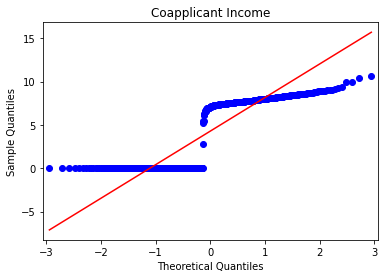

In [ ]:
sm.qqplot(numerical['CoapplicantIncome'],line='s')
plt.title('Coapplicant Income')
py.show

<function matplotlib.pyplot.show>

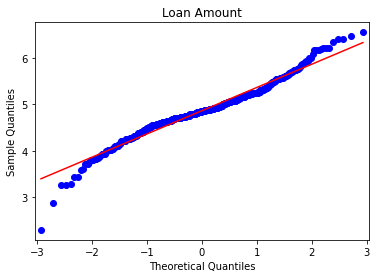

In [ ]:
loanam = numerical['LoanAmount'][:]
loanam = loanam.dropna()
sm.qqplot(loanam,line='s')
plt.title('Loan Amount')
py.show

This seems to have attained a normal distribution after Log transformation.

<Figure size 840x560 with 0 Axes>

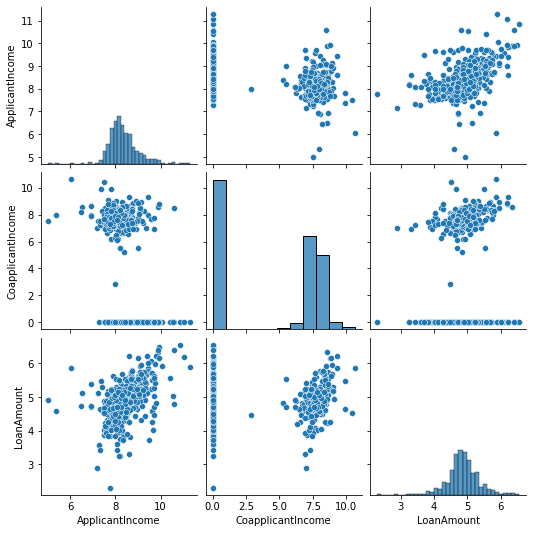

In [ ]:
plt.figure(dpi=140)
sns.pairplot(numerical[var])

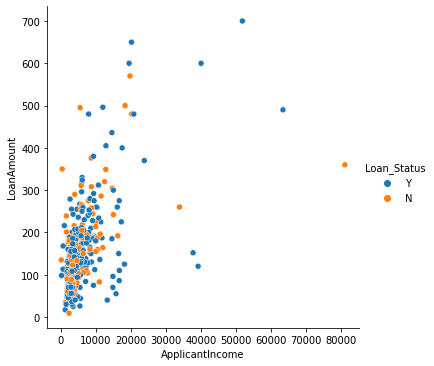

In [ ]:
sns.relplot(x="ApplicantIncome",y='LoanAmount',data = train_d,hue='Loan_Status',kind='scatter')

## Continous - Categorical

Lists of investigation to perform in this section:
* Applicants with higher income will get an loan approval easily?
* Applicants with low Loan amount to get a loan approval?

In [ ]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [ ]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [ ]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,3,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,3,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')

  # violin plot
  plt.subplot(1,3,3)
  sns.violinplot(x=cat,y=cont,data= data)
  plt.title('Categorical violin plot')
  

**1. Applicants with higher income will get an loan approval easily?**

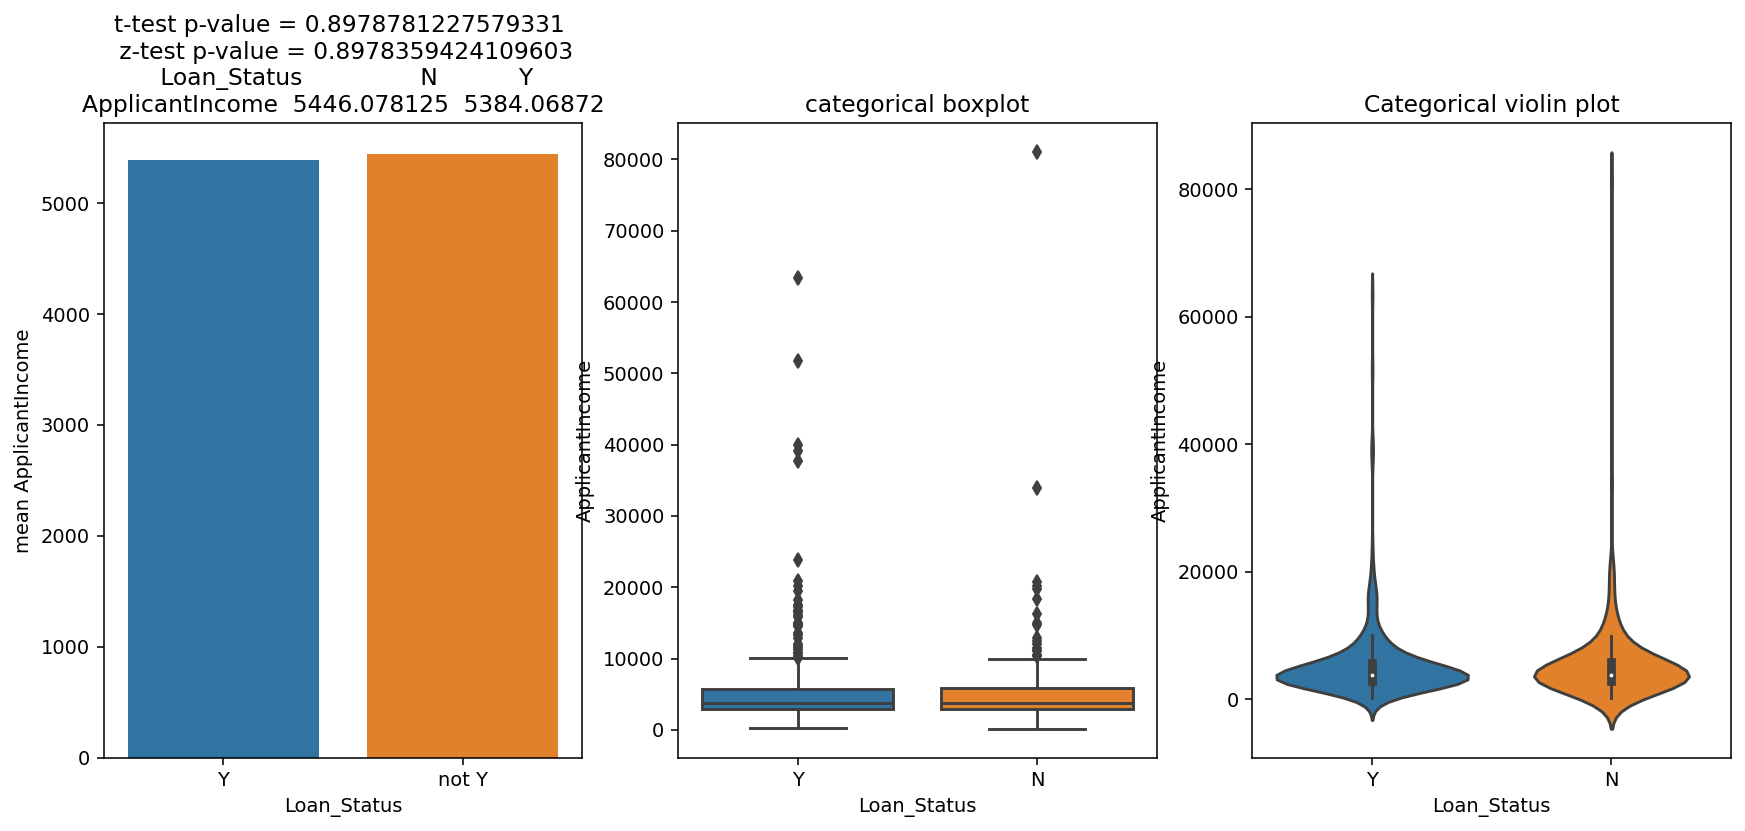

In [ ]:
Bivariate_cont_cat(train_d,'ApplicantIncome','Loan_Status','Y')

**Inferences**:
* Applicants having higher income didn't get a loan approval. Applicants who didn't get loan approval had a higher mean income. But the results are not significantly different.
* Boxplot and violin plot shows similiar distribution. 

**Result**:
We can safely reject the hypothesis that applicants with higher income get a loan approval.

**2. Applicants with low Loan amount to get a loan approval?**

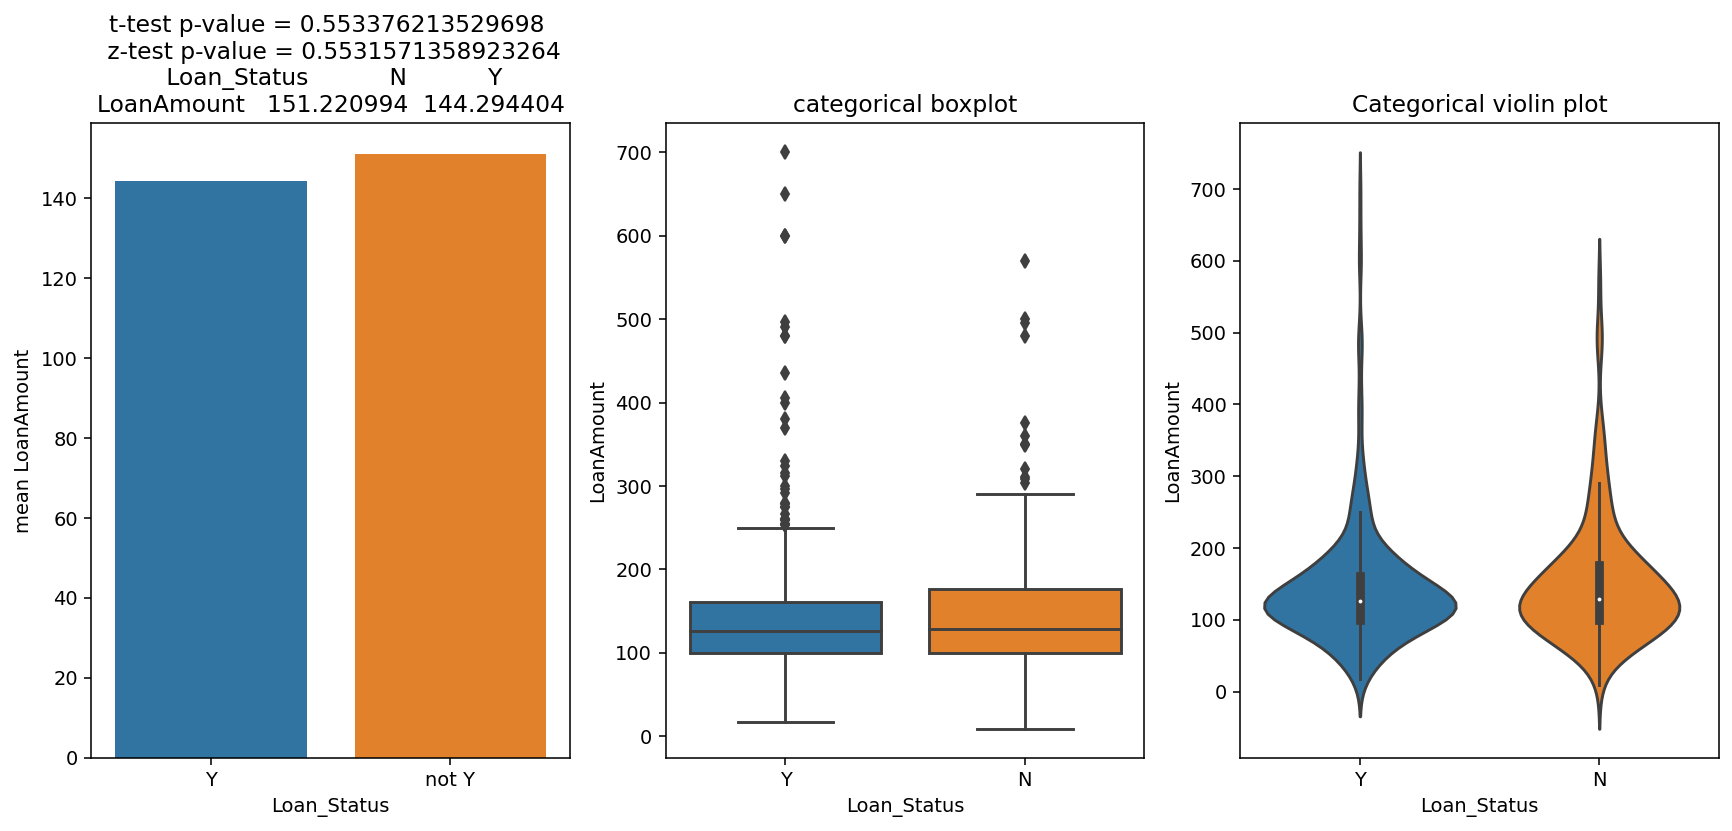

In [ ]:
Bivariate_cont_cat(train_d,'LoanAmount','Loan_Status','Y')

**Inferences**:
* Applicants getting a loan approval have a lower loan amount, but the results are not significant
* Boxplot and violin plot shows similiar distribution. 

**Result**:
We can safely reject the hypothesis that applicants with lower loan amount get a loan approval.

## Categorical - Categorical

List of hypothesis to check under this:
* Are Males more likely to get a loan approval?
* People having zero no. of dependents are more likely to get a loan approval.
* Graduates have more chances of getting a loan approval.
* People having a Credit_History of 1 have a higher chance if getting a loan approval.
* People who are Self-Employed are less likely to get a loan approval.
* Do people living in Semi-Urban and Urban areas have higher possibility of getting a loan approval.
* Applying for 360 months for loan amount will lead to have a better chance for loan approval.



---



**Missing Values** - finding behavior

**Self_Employed**:
* Do missing values have any relation with loan_status?

**Credit_History**:
* Do missing values have any relation with loan_status?


In [ ]:
train_d.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

**1. Are Males more likely to get a loan approval?**

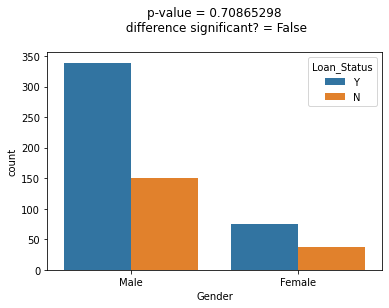

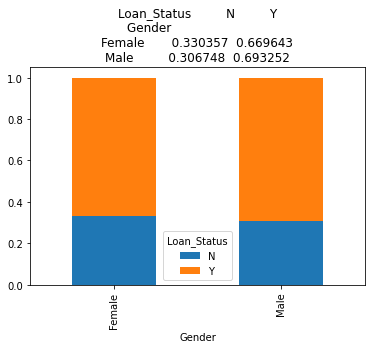

In [ ]:
BVA_categorical_plot(train_d,'Loan_Status','Gender')

**Result**: The difference between the males and females applicant is i*nsignificant*.

**2. People having zero no. of dependents are more likely to get a loan approval.**

In [ ]:
train_d['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
# segregating dependents into categories
dependents = train_d[['Loan_Status','Dependents']][:]
dependents.dropna()
dependents['dep_group'] = None
dependents['dep_group'][dependents['Dependents']=='0'] = 'single'
dependents['dep_group'][(dependents['Dependents']=='1') | (dependents['Dependents']=='2')] = 'small family'
dependents['dep_group'][(dependents['Dependents']=='3+') ] = 'large family'
dependents.head()

,Loan_Status,Dependents,dep_group
0,Y,0,single
1,N,1,small family
2,Y,0,single
3,Y,0,single
4,Y,0,single


In [ ]:
dependents.dep_group.value_counts()

single          345
small family    203
large family     51
Name: dep_group, dtype: int64

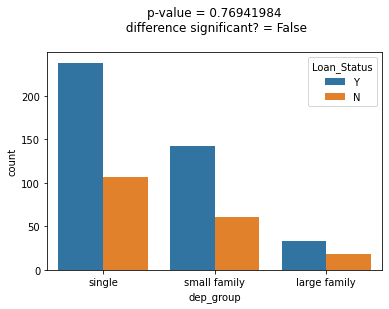

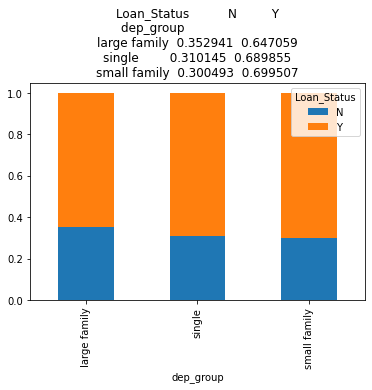

In [ ]:
BVA_categorical_plot(dependents,'Loan_Status','dep_group')

**Result**: Number of dependents does not play role in loan status.


**3. Graduates have more chances of getting a loan approval.**

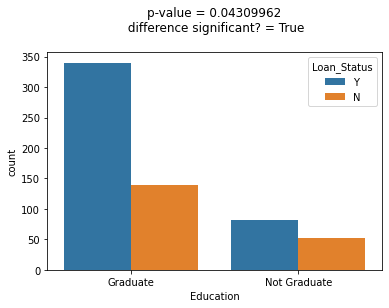

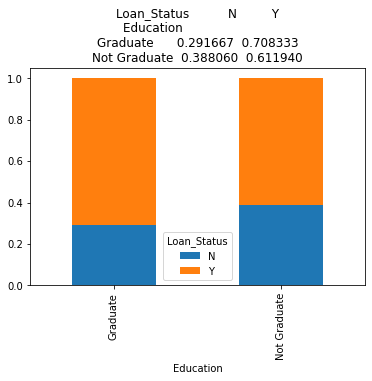

In [ ]:
BVA_categorical_plot(train_d,'Loan_Status','Education')

**Result**: 
* There is significant differnce between people being **Graduate** and **Not Graduate**.
* This variable will help a lot in baseline model.

**4. People having a Credit_History of 1 have a higher chance if getting a loan approval.**

In [ ]:
train_d.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
credit_hist = train_d[['Loan_Status','Credit_History']][:]
credit_hist.head()

,Loan_Status,Credit_History
0,Y,1
1,N,1
2,Y,1
3,Y,1
4,Y,1


In [ ]:
#credit_hist=
credit_hist.dropna(inplace=True)
credit_hist.reset_index(inplace=True,drop=True)

In [ ]:
print(credit_hist.head())
print(credit_hist.shape)

  Loan_Status Credit_History
0           Y              1
1           N              1
2           Y              1
3           Y              1
4           Y              1
(564, 2)


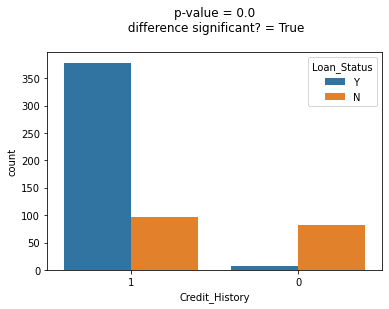

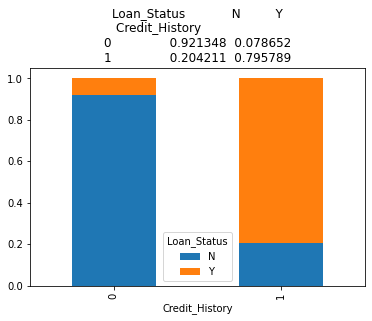

In [ ]:
BVA_categorical_plot(credit_hist,'Loan_Status','Credit_History')

**Result**: Credit History plays a significant role in Loan Approval.

**5. People who are Self-Employed are less likely to get a loan approval.**

In [ ]:
self_emp = train_d[['Loan_Status','Self_Employed']][:]
self_emp.dropna(inplace = True)
self_emp.reset_index(inplace=True,drop = True)
self_emp

,Loan_Status,Self_Employed
0,Y,No
1,N,No
2,Y,Yes
3,Y,No
4,Y,No
...,...,...
577,Y,No
578,Y,No
579,Y,No
580,Y,No


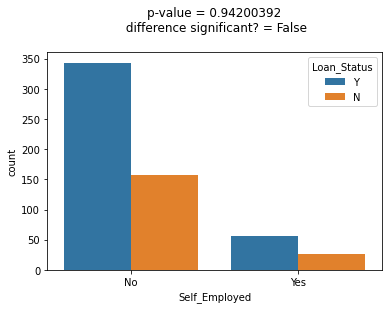

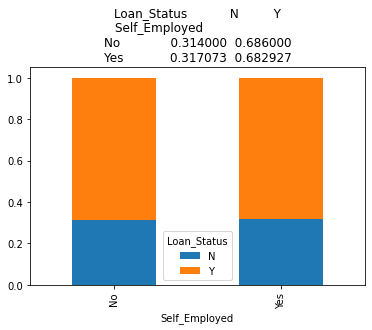

In [ ]:
BVA_categorical_plot(self_emp,'Loan_Status','Self_Employed')

**Result**: There is no significant differnce in applicant being self-employed or not in getting a loan approval.


**6. Do people living in Semi-Urban and Urban areas have higher possibility of getting a loan approval.**

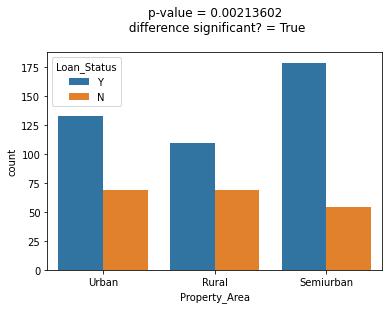

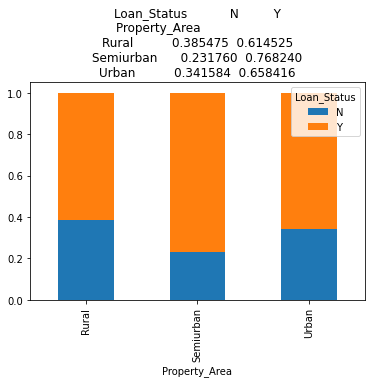

In [ ]:
BVA_categorical_plot(train_d,'Loan_Status','Property_Area')

**Result**: Property-Area plays a significant role in getting a loan approval.

**7. Applying for 360 months for loan amount will lead to have a better chance for loan approval.**

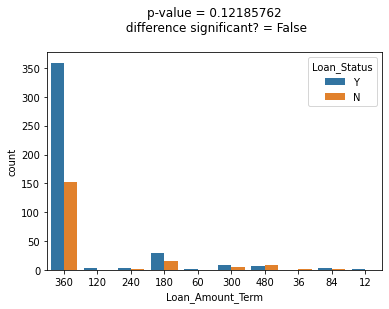

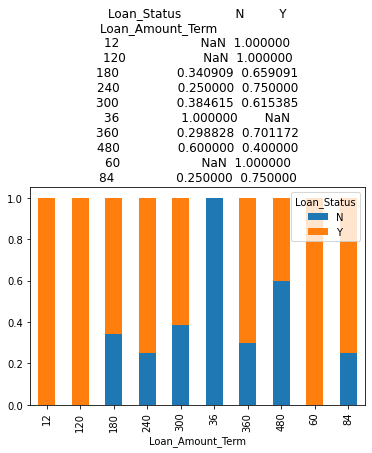

In [ ]:
BVA_categorical_plot(train_d,'Loan_Status','Loan_Amount_Term')

**Result**: Loan_Amount_Term does not play a significant role in getting a loan approval.

**MISSING VALUES:**

**Self_Employed**

In [ ]:
train_d.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [ ]:
miss_se = train_d[:]
miss_se ['missing_se'] = 'not_missing'
miss_se['missing_se'][~miss_se['Self_Employed'].isin(['Yes','No'])] = 'missing value'


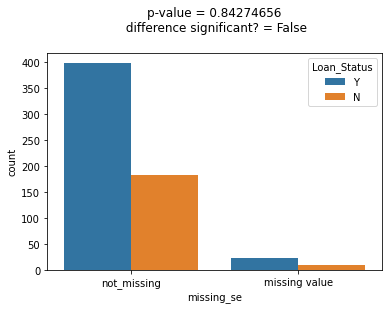

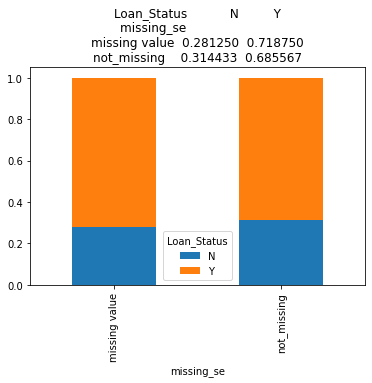

In [ ]:
BVA_categorical_plot(miss_se,'Loan_Status','missing_se')

**There is no different behaviour of the missing values in Self_Employed.**

**Credit_History**

In [ ]:
train_d.Credit_History.unique()

array(['1', '0', nan], dtype=object)

In [ ]:
miss_CH = train_d[:]
miss_CH['missing_CH'] = 'Not_Missing'
miss_CH['missing_CH'][~miss_CH['Credit_History'].isin(['1','0'])] = 'Missing Values'

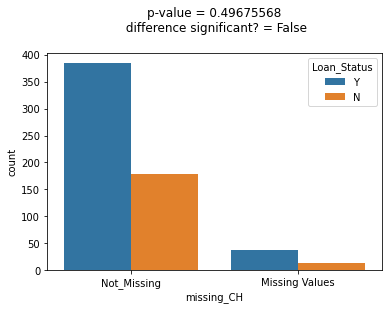

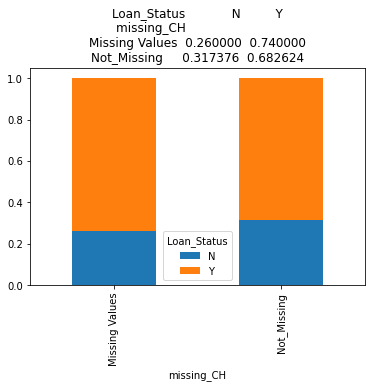

In [ ]:
BVA_categorical_plot(miss_CH,'Loan_Status','missing_CH')

There seems to be no different trend in the missing values.

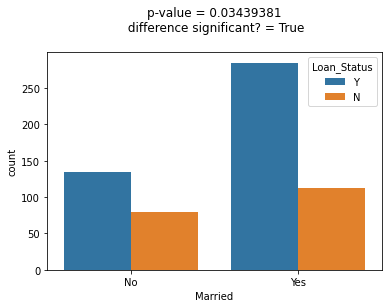

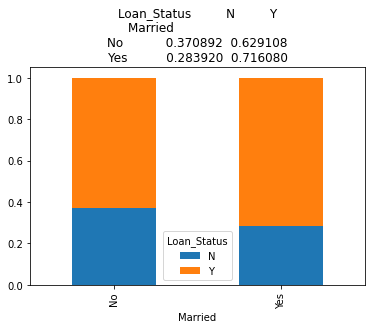

In [ ]:
BVA_categorical_plot(train_d,'Loan_Status','Married')

This seems that marriage makes a significant role in getting a loan approved.


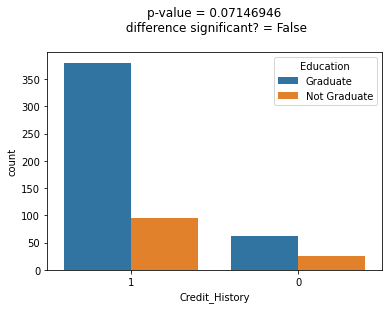

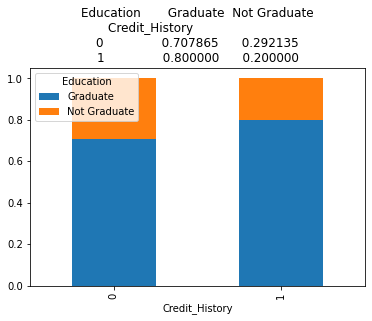

In [ ]:
BVA_categorical_plot(train_d,'Education','Credit_History')

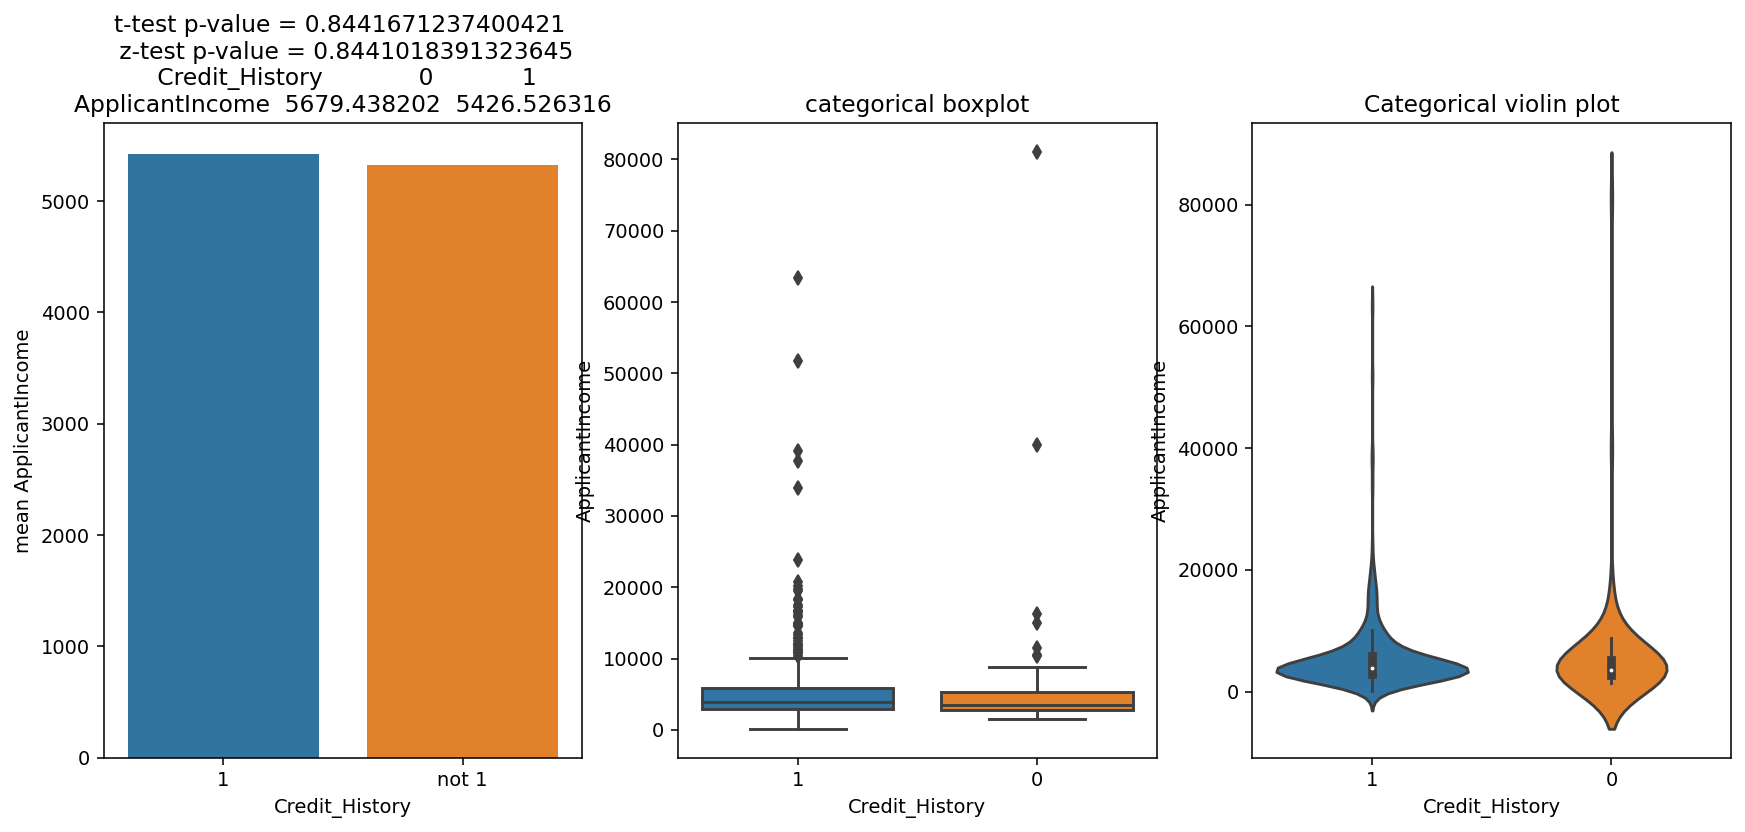

In [ ]:
Bivariate_cont_cat(train_d,'ApplicantIncome','Credit_History','1')

# Preprocessing 

## Filling the missing values

In [ ]:
train_d.isnull().sum()/len(train_d)*100

Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

* Fill all the categorical variables with the mode except for Self_Employed and Credit_History because they have a large percentage of missing values with respect to other variables.
* Fill all the contnious variables with the median.

### Categorical

**Gender**

In [ ]:
train_d.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
train_d.Gender.mode()[0]

'Male'

In [ ]:
train_d.Gender.fillna(value=train_d.Gender.mode()[0],inplace=True)

**Maritial Status**

In [ ]:
train_d.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
train_d.Married.fillna(value=train_d.Married.mode()[0],inplace=True)

**Dependents**

In [ ]:
train_d.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
train_d.Dependents.fillna(value=train_d.Dependents.mode()[0],inplace=True)

**Loan_Amount_Term**

In [ ]:
train_d.Loan_Amount_Term.value_counts()

360    512
180     44
480     15
300     13
84       4
240      4
120      3
60       2
36       2
12       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
train_d.Loan_Amount_Term.fillna(value=train_d.Loan_Amount_Term.mode()[0],inplace=True)

**Self_Employed**

In [ ]:
train_d.loc[train_d.Self_Employed.isnull() == True]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360,1,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,360,1,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360,NaN,Semiurban,N
29,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360,1,Semiurban,Y
30,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360,NaN,Urban,N
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360,NaN,Urban,N
107,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360,1,Rural,N
111,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360,1,Semiurban,Y
114,Male,No,0,Graduate,NaN,5050,0.0,118.0,360,1,Semiurban,Y
158,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360,1,Rural,Y


In [ ]:
train_d.loc[train_d.Education == 'Not Graduate']['Self_Employed'].value_counts()

No     111
Yes     17
Name: Self_Employed, dtype: int64

In [ ]:
train_d.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [ ]:
self_e = train_d.groupby(['Education']).count()['Self_Employed']
self_e = pd.DataFrame(self_e)
self_e

,Self_Employed
Education,
Graduate,454
Not Graduate,128


In [ ]:
train_d.Self_Employed.fillna(value=train_d.Self_Employed.mode()[0],inplace=True)

In [ ]:
train_d.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Credit_History**

In [ ]:
train_d.loc[train_d.Credit_History.isnull() == True]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240,NaN,Urban,Y
24,Male,Yes,1,Graduate,No,3717,2925.0,151.0,360,NaN,Semiurban,N
30,Male,Yes,1,Graduate,No,4166,3369.0,201.0,360,NaN,Urban,N
42,Male,Yes,0,Graduate,No,2400,0.0,75.0,360,NaN,Urban,Y
79,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360,NaN,Semiurban,Y
83,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360,NaN,Semiurban,N
86,Male,Yes,2,Not Graduate,No,3333,2000.0,99.0,360,NaN,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360,NaN,Urban,N
117,Male,Yes,1,Graduate,No,2214,1398.0,85.0,360,NaN,Urban,Y
125,Female,No,0,Graduate,No,3692,0.0,93.0,360,NaN,Rural,Y


In [ ]:
train_d.Credit_History.fillna(value=train_d.Credit_History.mode()[0],inplace=True)

### Continous

In [ ]:
train_d.loc[train_d.LoanAmount.isnull()==True]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360,1,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360,0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360,1,Semiurban,Y
95,Male,No,0,Graduate,No,6782,0.0,NaN,360,1,Urban,N
102,Male,Yes,0,Graduate,No,13650,0.0,NaN,360,1,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360,1,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360,1,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360,1,Rural,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180,1,Urban,N


In [ ]:
train_d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


In [ ]:
train_d.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## Creating dummy variables

In [ ]:
train_d.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360,1,Urban,Y


In [ ]:
dict_loan_status = {'Y':1,'N':0}
train_d.Loan_Status = train_d.Loan_Status.map(dict_loan_status)

In [ ]:
train_d = pd.get_dummies(train_d)

In [ ]:
train_d.head()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,NaN,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0
2,3000,0.0,66.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2583,2358.0,120.0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,6000,0.0,141.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
train_col=train_d.columns

In [ ]:
train_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_12', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Credit_History_0',
       'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=4)
impute_train= impute.fit_transform(train_d)

In [ ]:
train_d =pd.DataFrame(impute_train,columns=train_col)

In [ ]:
train_d.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849.0,0.0,151.5,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,4583.0,1508.0,128.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,3000.0,0.0,66.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,2583.0,2358.0,120.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,6000.0,0.0,141.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#rain_d['Total_income']= train_d.ApplicantIncome + train_d.CoapplicantIncome

In [ ]:
#UVA_numeric(train_d,['Total_income'])

In [ ]:
train_d.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Status                0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Loan_Amount_Term_12        0
Loan_Amount_Term_120       0
Loan_Amount_Term_180       0
Loan_Amount_Term_240       0
Loan_Amount_Term_300       0
Loan_Amount_Term_36        0
Loan_Amount_Term_360       0
Loan_Amount_Term_480       0
Loan_Amount_Term_60        0
Loan_Amount_Term_84        0
Credit_History_0           0
Credit_History_1           0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

### Log Transformation Of Continous Variables

In [ ]:
var = Income + Loan #+['Total_income']
for column in var:
  mini=1
  if train_d[column].min()<0:
    mini =  abs(train_d[column].min()) + 1
  
  train_d[column] = [i+mini for i in train_d[column]]
  train_d[column] = train_d[column].map(lambda x : np.log(x))

In [ ]:
train_d.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,5.027165,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,8.430327,7.319202,4.859812,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,8.006701,0.000000,4.204693,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7.857094,7.765993,4.795791,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,8.699681,0.000000,4.955827,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#UVA_numeric(train_d,['Total_income'])

In [ ]:
data_clean = train_d
data_clean.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.674197,0.000000,5.027165,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,8.430327,7.319202,4.859812,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,8.006701,0.000000,4.204693,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,7.857094,7.765993,4.795791,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,8.699681,0.000000,4.955827,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [ ]:
train_d.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Loan_Amount_Term_12', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Credit_History_0',
       'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

#Baseline Model

In [ ]:
columns=['Education','Married','Credit_History','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Property_Area','Loan_Status']
cols=[ 'LoanAmount', 
        'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate',  'Loan_Amount_Term_12', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Credit_History_0',
       'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status']
bsml_data = data_clean[cols]
bsml_data.head() 

,LoanAmount,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status
0,5.027165,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,4.859812,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,4.204693,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,4.795791,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,4.955827,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0


In [ ]:
# traincol=train_d.columns
# from sklearn.preprocessing import MinMaxScaler
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(train_d)
# train_d=pd.DataFrame(x_scaled, columns = traincol)
# train_d.head()

# Stacking

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import KFold

def kfold_predictions( model , n_splits , train_x , train_y, test_x ):
    ## Initializing empty Numpy Arrays
    train_pred = np.empty((0,0) , int)
    skfold = KFold(n_splits,random_state = 9)
  
    #For every permutation of KFold
    for i,j in skfold.split(train_x, train_y):
        x_train, x_test = train_x.iloc[i], train_x.iloc[j]
        y_train, y_test = train_y.iloc[i], train_y.iloc[j]
    
        #Train a model on training set
        model.fit( X = x_train, y = y_train)
    
        #Predict on Chosen Group
        tmp = model.predict(x_test)
    
        #Storing train predictions
        train_pred = np.append(train_pred, tmp)
    
    #Training on complete data and generating Predictionson Test set
    model.fit(train_x, train_y)
    test_pred = model.predict(test_x)
  
    return train_pred, test_pred

In [ ]:
## Base Linear Regression model
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
M1_train, M1_test = kfold_predictions( LR, 10, x_train, y_train, x_test) 
#lr_train_pred.shape, lr_test_pred.shape, data_x.shape, data_y.shape

NameError: ignored

In [ ]:
accuracy_score(y_train,M1_train),accuracy_score(y_test,M1_test)

In [ ]:
# Base Decision Tree Model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters={
    'criterion':['gini', 'entropy'],
    'max_depth':[2,3,4,5,6],
    'min_samples_split':[10,15,20,30,40,80],
    'min_samples_leaf':[10,15,20,30,50,70],
}
DT = DecisionTreeClassifier()

gridsearch= GridSearchCV(estimator=DT, param_grid=parameters, scoring='neg_mean_squared_error', cv=5)

In [ ]:
gridsearch.fit(x_train,y_train)

In [ ]:
gridsearch.best_params_

In [ ]:
dtc=DecisionTreeClassifier(max_depth=4,min_samples_leaf=10,min_samples_split=80)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
randomsearch = RandomizedSearchCV(estimator = DT,param_distributions=parameters, n_iter= 20, cv=5)

In [ ]:
randomsearch.fit(x_train,y_train)

In [ ]:
randomsearch.best_params_

In [ ]:
DTC = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,min_samples_split=20)

In [ ]:
DTC.fit(x_train,y_train)

In [ ]:
DTC.score(x_train,y_train)

In [ ]:
M2_train, M2_test = kfold_predictions(dtc, 10, x_train, y_train, x_test) 

In [ ]:
accuracy_score(y_train,M2_train),accuracy_score(y_test,M2_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
parametersKNN={
    'n_neighbors':[i for i in range(1,50)]
}
randomsearchKNN= RandomizedSearchCV(estimator=knn,param_distributions=parametersKNN,n_iter=12,cv=6)

In [ ]:
randomsearchKNN.fit(x_train,y_train)

In [ ]:
randomsearchKNN.best_params_

In [ ]:
M3_train, M3_test= kfold_predictions(KNeighborsClassifier(n_neighbors=20), 10, x_train, y_train, x_test) 
accuracy_score(y_train,M3_train),accuracy_score(y_test,M3_test)

In [ ]:
# Arranging Train KFold Predictions
train_prediction = {
              'LR': M1_train,
              'KNN': M3_train,
              'DT': M2_train
              }
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

In [ ]:
# Arranging test KFold Predictions
test_prediction = {
              'LR': M1_test,
              'KNN': M3_test,
              'DT': M2_test
              }
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

In [ ]:
gridsearch.fit(train_predictions,y_train)

In [ ]:
gridsearch.best_params_

In [ ]:
model= DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,min_samples_split=10)
model.fit(train_predictions,y_train)

In [ ]:
predict = model.predict(test_predictions)


In [ ]:
model.score(train_predictions,y_train)

In [ ]:
model.score( test_predictions ,y_test)

#Random Forest 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split as tts


In [ ]:
x=train_d.drop(['Loan_Status'],axis=1)
y=train_d['Loan_Status']
x.shape,y.shape

((614, 30), (614,))

In [ ]:
train_x,test_x,train_y,test_y = tts(x,y,random_state=78,test_size=0.2,stratify=y)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((491, 30), (491,), (123, 30), (123,))

In [ ]:
rf = RandomForestClassifier(random_state=78)

In [ ]:
rf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=78, verbose=0,
                       warm_start=False)

In [ ]:
rf.score(train_x,train_y)

1.0

In [ ]:
rf.score(test_x,test_y)

0.8130081300813008

In [ ]:
parametersRF={
    'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'criterion':['gini','entropy'],
    'max_depth':[int(x) for x in np.linspace(10, 110, num = 11)],
    #'max_sample':[i/100 for i in range(1,100,2)],
    'min_samples_split':range(1,100,2),
    'min_samples_leaf':range(1,100,2),
    'max_features':['sqrt','log2',8,10,12],
    'n_jobs':[-1],
    'bootstrap':[True,False]
}

In [ ]:
#gridSearchRF= GridSearchCV(estimator=clf,param_grid=parametersRF,scoring='neg_mean_squared_error', cv=5)

In [ ]:
#gridSearchRF.fit(train_x,train_y)

In [ ]:
#gridSearchRF.best_params_

In [ ]:
#randomsearchRF=RandomizedSearchCV(estimator=rf,param_distributions=parametersRF,n_iter=100,cv=5,random_state=67)

In [ ]:
#randomsearchRF.fit(train_x,train_y)

In [1]:
#randomsearchRF.best_params_

In [ ]:
#randomsearchRF.best_score_

In [ ]:
RF= RandomForestClassifier(n_estimators=150,max_features=12,max_depth=4,min_samples_leaf=10,min_samples_split=30,n_jobs=-1,random_state=78)

In [ ]:
RF.fit(train_x,train_y)

In [ ]:
RF.score(train_x,train_y)

In [ ]:
RF.score(test_x,test_y)

In [ ]:
RF.predict(test_x)

In [ ]:
RF.feature_importances_

In [ ]:
pd.Series(RF.feature_importances_, index=train_x.columns)

# Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbm = GradientBoostingClassifier(random_state=45)

In [ ]:
gbm.fit(train_x,train_y)

In [ ]:
gbm.score(train_x,train_y)

In [ ]:
gbm.score(test_x,test_y)

In [ ]:
parametersGBM ={
    'loss':['deviance','exponential'],
    'learning_rate':[0.1,0.3,0.5],
    'n_estimators':[50,75,100,125],
    'subsample':[0.6,0.8,1.0,1.2],
    'max_depth':[3,4,5],
    'min_samples_split':[10,20,30],
    'min_samples_leaf':[10,20,30],
    'max_features':['sqrt','log2',6,8,10]
}

In [ ]:
#gridsearchGBM=GridSearchCV(estimator=clf,param_grid=parametersGBM,scoring='neg_mean_squared_error',cv=5)

In [ ]:
#gridsearchGBM.fit(train_x,train_y)

In [ ]:
randomsearchGBM=RandomizedSearchCV(estimator=gbm,param_distributions=parametersGBM,n_iter=20,cv=5)

In [ ]:
randomsearchGBM.fit(train_x,train_y)

In [ ]:
randomsearchGBM.best_params_

In [ ]:
GBM=GradientBoostingClassifier(n_estimators=125,max_depth=4,max_features=6,min_samples_leaf=30,min_samples_split=30,subsample=0.6,random_state=45)

In [ ]:
GBM.fit(train_x,train_y)

In [ ]:
GBM.score(train_x,train_y)

In [ ]:
GBM.score(test_x,test_y)

# Extreme Gradient Boosting Machine

In [ ]:
cols=[ 'LoanAmount','Married_No', 'Married_Yes','Education_Graduate', 
      'Education_Not Graduate',  'Loan_Amount_Term_12', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Credit_History_0',
       'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status']
test_col=['LoanAmount','Married_No', 'Married_Yes','Education_Graduate', 
      'Education_Not Graduate',  'Loan_Amount_Term_12', 'Loan_Amount_Term_120',
       'Loan_Amount_Term_180', 'Loan_Amount_Term_240', 'Loan_Amount_Term_300',
       'Loan_Amount_Term_36', 'Loan_Amount_Term_360', 'Loan_Amount_Term_480',
       'Loan_Amount_Term_60', 'Loan_Amount_Term_84', 'Credit_History_0',
       'Credit_History_1', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban']

In [ ]:
xgb_data=train_d[cols]

In [ ]:
x1=xgb_data.drop(labels=['Loan_Status'],axis=1)
y1=xgb_data['Loan_Status']
x_train,x_test,y_train,y_test= tts(x1,y1,test_size=0.1,stratify=y1,random_state=45)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=45)

In [ ]:
xgb.fit(train_x,train_y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=45,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(train_x,train_y)

0.8635437881873728

In [ ]:
xgb.score(test_x,test_y)

0.8048780487804879

In [ ]:
parametersXGBM={
    'learning_rate':[i/100 for i in range(50,150,2)],
    'n_estimators':[i for i in range(70,180,2)],
    'subsample':[i/100.0 for i in range(5,81,5)],
    'max_depth':[2,3,4],
    'colsample_bylevel':[i/100.0 for i in range(12,80,2)],
    'colsample_bytree':[i/100.0 for i in range(12,80,2)],
    #'reg_alpha':[i/10 for i in range(1,100)]+[i/100 for i in range(1,100)]+[i/1000 for i in range(1,100)],
    'min_child_weight':range(1,6)
}

In [ ]:
#gridsearchXGBM=GridSearchCV(estimator=xgb,param_grid=parametersXGBM,scoring='neg_mean_squared_error',cv=5)

In [ ]:
#gridsearchXGBM.fit(train_x,train_y)

In [ ]:
randomsearchXGBM= RandomizedSearchCV(estimator=xgb,param_distributions=parametersXGBM,n_iter=3000,cv=5,n_jobs=-1)

In [ ]:
randomsearchXGBM.fit(x_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=45, reg_alpha=0,
                                           reg_lambda=1, s...
                                        'max_depth': [2, 3, 4],
                                        'min_child_weight': range(1, 6),
                                        

In [ ]:
randomsearchXGBM.best_params_

{'colsample_bylevel': 0.72,
 'colsample_bytree': 0.14,
 'learning_rate': 0.52,
 'max_depth': 2,
 'min_child_weight': 4,
 'n_estimators': 118,
 'subsample': 0.6}

In [ ]:
randomsearchXGBM.best_score_

0.817018837018837

In [ ]:
XGBM=XGBClassifier(booster='gbtree',n_estimators=104,objective='binary:logistic',subsample=0.45,learning_rate=0.72,max_depth=4,colsample_bylevel=0.26,colsample_bytree=0.32,reg_alpha=0,eval_metric='logloss',gamma=0.0,min_child_weight=1,random_state=45)

In [ ]:
XGBM.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.26,
              colsample_bynode=1, colsample_bytree=0.32, eval_metric='logloss',
              gamma=0.0, learning_rate=0.72, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=104, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=45,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.45, verbosity=1)

In [ ]:
XGBM.score(x_train,y_train)

0.8170289855072463

In [ ]:
XGBM.score(x_test,y_test)

0.8225806451612904

# Adaptive Boosting

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostClassifier(base_estimator=RF,n_estimators=100,learning_rate=0.1,random_state=45)

In [ ]:
#ada.fit(train_x,train_y)

KeyboardInterrupt: ignored

In [ ]:
#ada.score(train_x,train_y)

In [ ]:
#ada.score(test_x,test_y)

# Support Vector Machine


In [ ]:
from sklearn.svm import SVC

In [ ]:
svc=SVC()

In [ ]:
#svc.fit(train_x,train_y)

In [ ]:
#svc.score(train_x,train_y)

In [ ]:
parametersSVC={
    'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1],
    'gamma':[0.05,0.06,0.07,0.08,0.1,0.12,0.13],
    'kernel':['rbf','poly','linear'],
    'degree':[2,3,4,5,6]
}

In [ ]:
randomsearchSVC = RandomizedSearchCV(estimator=svc,param_distributions=parametersSVC,n_iter=25,cv=5,n_jobs=-1)

In [ ]:
randomsearchSVC.fit(train_x,train_y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=25, n_jobs=-1,
                   param_distributions={'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                              0.8, 1],
                                        'degree': [2, 3, 4, 5, 6],
                                        'gamma': [0.05, 0.06, 0.07, 0.08, 0.1,
                                                  0.12, 0.13],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs',

In [ ]:
randomsearchSVC.best_params_

{'C': 0.5, 'degree': 6, 'gamma': 0.13, 'kernel': 'rbf'}

In [ ]:
randomsearchSVC.best_score_

0.8126571840857556

In [ ]:
svc = SVC(C=0.5,degree=6,gamma=0.13,kernel='rbf')

In [ ]:
svc.fit(train_x,train_y)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma=0.13, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc.score(train_x,train_y)

0.8126272912423625

In [ ]:
svc.score(test_x,test_y)

0.7967479674796748

# Test File

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/data/loan_prediction/test_file.csv')

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
test.shape

(367, 12)

In [ ]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [ ]:
test.Credit_History = test.Credit_History.map({1:'1',0:'0'})

In [ ]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [ ]:
test.Gender.fillna(value=test.Gender.mode()[0],inplace=True)
test.Dependents.fillna(value=test.Dependents.mode()[0],inplace=True)
test.Self_Employed.fillna(value=test.Self_Employed.mode()[0],inplace=True)
test.LoanAmount.fillna(value=test.LoanAmount.median(),inplace=True)
test.Credit_History.fillna(value=test.Credit_History.mode()[0],inplace=True)

In [ ]:
loan_id=test.Loan_ID

In [ ]:
test=test.drop(labels=['Loan_ID'],axis=1)

In [ ]:
months = {360.0:'360', 120.0:'120', 240.0:'240', 180.0:'180',  60.0:'60', 300.0:'300', 480.0:'480',  36.0:'36',  84.0:'84',  12.0:'12'}
test.Loan_Amount_Term = test.Loan_Amount_Term.map(months) 

In [ ]:
test = pd.get_dummies(test)

In [ ]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,3076,1500,126.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,5000,1800,208.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,2340,2546,100.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,3276,0,78.0,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
var = Income + Loan #+['Total_income']
for column in var:
  mini=1
  if train_d[column].min()<0:
    mini =  abs(test[column].min()) + 1
  
  test[column] = [i+mini for i in test[column]]
  test[column] = test[column].map(lambda x : np.log(x))

In [ ]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Loan_Amount_Term_12,Loan_Amount_Term_120,Loan_Amount_Term_180,Loan_Amount_Term_240,Loan_Amount_Term_300,Loan_Amount_Term_36,Loan_Amount_Term_360,Loan_Amount_Term_480,Loan_Amount_Term_60,Loan_Amount_Term_84,Credit_History_0,Credit_History_1,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,8.651899,0.000000,4.709530,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
1,8.031710,7.313887,4.844187,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
2,8.517393,7.496097,5.342334,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
3,7.758333,7.842671,4.615121,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1
4,8.094684,0.000000,4.369448,0,1,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1


In [ ]:
test.columns,test.shape

(Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Female',
        'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
        'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Loan_Amount_Term_12', 'Loan_Amount_Term_120', 'Loan_Amount_Term_180',
        'Loan_Amount_Term_240', 'Loan_Amount_Term_300', 'Loan_Amount_Term_36',
        'Loan_Amount_Term_360', 'Loan_Amount_Term_480', 'Loan_Amount_Term_60',
        'Loan_Amount_Term_84', 'Credit_History_0', 'Credit_History_1',
        'Property_Area_Rural', 'Property_Area_Semiurban',
        'Property_Area_Urban'],
       dtype='object'), (367, 30))

In [ ]:
train_x.columns,train_x.shape

(Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Gender_Female',
        'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_0',
        'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Graduate',
        'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
        'Loan_Amount_Term_12', 'Loan_Amount_Term_120', 'Loan_Amount_Term_180',
        'Loan_Amount_Term_240', 'Loan_Amount_Term_300', 'Loan_Amount_Term_36',
        'Loan_Amount_Term_360', 'Loan_Amount_Term_480', 'Loan_Amount_Term_60',
        'Loan_Amount_Term_84', 'Credit_History_0', 'Credit_History_1',
        'Property_Area_Rural', 'Property_Area_Semiurban',
        'Property_Area_Urban'],
       dtype='object'), (491, 30))

# Random Forest

In [ ]:
testfilePRED=rf.predict(test)
testfilePRED

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [ ]:
predRF = pd.DataFrame(loan_id,columns=['Loan_ID'])
predRF['Loan_Status']= testfilePRED

In [ ]:
predRF.Loan_Status.value_counts()

1.0    286
0.0     81
Name: Loan_Status, dtype: int64

In [ ]:
predRF.reset_index(inplace=True,drop=True)


In [ ]:
predRF['Loan_Status']=predRF['Loan_Status'].map({1:'Y',0:'N'})
predRF.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [ ]:
predRF.to_csv('/content/drive/MyDrive/data/loan_prediction/RF.csv',index=False)

# GBM


In [ ]:
testfileGBM =gbm.predict(test)
testfileGBM

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1.

In [ ]:
predGBM = pd.DataFrame(loan_id,columns=['Loan_ID'])
predGBM['Loan_Status']= testfileGBM

In [ ]:
predGBM['Loan_Status']=predGBM['Loan_Status'].map({1:'Y',0:'N'})
predGBM.reset_index(inplace=True,drop=True)
predGBM.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
predGBM.to_csv('/content/drive/MyDrive/data/loan_prediction/GBM.csv',index=False)

# XGBM

In [ ]:
testfileXGBM=xgb.predict(test)
testfileXGBM

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1.

In [ ]:
predXGBM = pd.DataFrame(loan_id,columns=['Loan_ID'])
predXGBM['Loan_Status']= testfileXGBM

In [ ]:
predXGBM['Loan_Status']=predXGBM['Loan_Status'].map({1:'Y',0:'N'})
predXGBM.reset_index(inplace=True,drop=True)
predXGBM.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
predXGBM.to_csv('/content/drive/MyDrive/data/loan_prediction/XGBM.csv',index=False)

# AdaBoost

In [ ]:
testfileADA=ada.predict(test)
testfileADA

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 1.

In [ ]:
predADA = pd.DataFrame(loan_id,columns=['Loan_ID'])
predADA['Loan_Status']= testfileADA
predADA['Loan_Status']=predADA['Loan_Status'].map({1:'Y',0:'N'})
predADA.reset_index(inplace=True,drop=True)
predADA.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N


In [ ]:
predADA.to_csv('/content/drive/MyDrive/data/loan_prediction/ADABOOST.csv',index=False)

# Support Vector Machine

In [ ]:
testfileSVC=svc.predict(test)

In [ ]:
predSVC = pd.DataFrame(loan_id,columns=['Loan_ID'])
predSVC['Loan_Status']= testfileSVC
predSVC['Loan_Status']=predSVC['Loan_Status'].map({1:'Y',0:'N'})
predSVC.reset_index(inplace=True,drop=True)
predSVC.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [ ]:
predSVC.to_csv('/content/drive/MyDrive/data/loan_prediction/SVC.csv',index=False)